<a href="https://colab.research.google.com/github/suyashstr/Credit-Card-Fraud-detection/blob/main/credit_card_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [12]:
#Loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('/content/creditcard.csv')

In [13]:
#first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [14]:
#Last 5 rows of the dataset
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13949,24754,1.252924,-0.182189,-0.802716,-0.210981,1.916713,3.643624,-0.778711,0.818295,1.706962,...,-0.497088,-1.211285,0.043809,0.964159,0.442030,0.261483,-0.051402,0.005112,23.74,0.0
13950,24756,-0.346979,-2.103284,-0.685061,1.961605,-0.401125,0.473632,1.133816,-0.256528,0.893409,...,0.359662,-0.316275,-0.864259,-0.279881,0.491802,-0.353996,-0.149931,0.129795,794.20,0.0
13951,24759,-6.053652,-5.988723,0.810413,-0.011811,1.308135,-0.590803,-0.725838,-0.234840,1.624646,...,-0.771970,1.474668,3.176363,-0.302410,0.052529,-0.373871,-0.700463,2.508443,60.00,0.0
13952,24759,1.169121,-1.284945,0.032717,-0.681670,0.660598,4.412578,-1.913115,1.076592,1.501230,...,-0.557596,-0.882435,-0.041523,0.975445,0.297229,0.550515,0.015029,0.032067,90.00,0.0
13953,24759,-6.917152,5.854171,-1.652458,-1.488884,-0.833891,-0.344418,0.393789,0.379968,6.133597,...,-1.404681,-1.124694,0.174333,-0.528234,0.990685,-0.035875,1.071374,-0.168831,NaN,NaN


In [15]:
#Dataset Info
credit_card_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13954 entries, 0 to 13953
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    13954 non-null  int64  
 1   V1      13954 non-null  float64
 2   V2      13954 non-null  float64
 3   V3      13954 non-null  float64
 4   V4      13954 non-null  float64
 5   V5      13954 non-null  float64
 6   V6      13954 non-null  float64
 7   V7      13954 non-null  float64
 8   V8      13954 non-null  float64
 9   V9      13954 non-null  float64
 10  V10     13954 non-null  float64
 11  V11     13954 non-null  float64
 12  V12     13954 non-null  float64
 13  V13     13954 non-null  float64
 14  V14     13954 non-null  float64
 15  V15     13954 non-null  float64
 16  V16     13954 non-null  float64
 17  V17     13954 non-null  float64
 18  V18     13954 non-null  float64
 19  V19     13954 non-null  float64
 20  V20     13954 non-null  float64
 21  V21     13954 non-null  float64
 22

In [16]:
#checking for missing values
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

In [17]:
#Handling missing values also importing the need libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
#Loading dataset to a pandas dataframe
credit_card_data = pd.read_csv('/content/creditcard.csv')


In [19]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [20]:
credit_card_data.shape

(13954, 31)

In [21]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    1
Class     1
dtype: int64

Central Tendencies

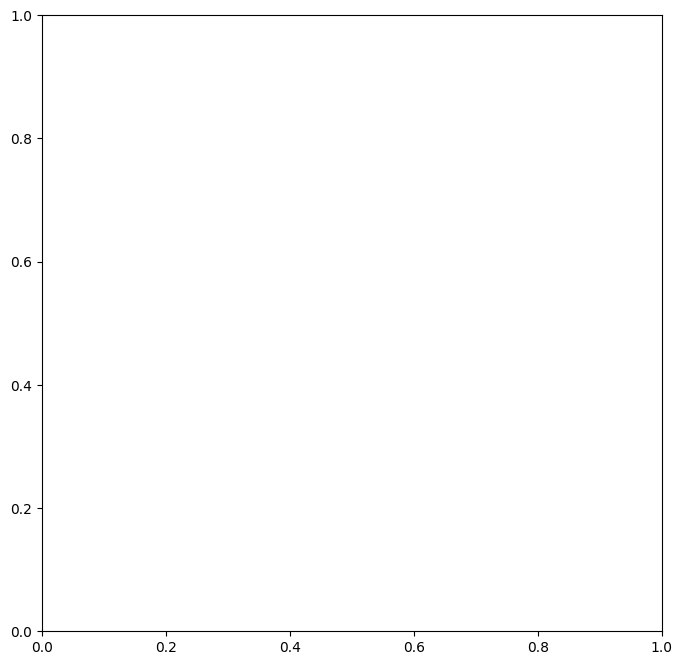

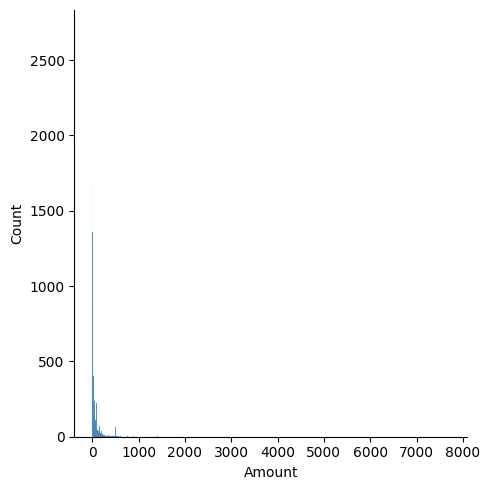

In [22]:
#Distribution of data in the salary
fig, ax = plt.subplots(figsize=(8,8))
sns.displot(credit_card_data.Amount)

Replacing the Vaules with median value

In [23]:
credit_card_data['Amount'].fillna(credit_card_data['Amount'].median(),inplace=True)

In [24]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     1
dtype: int64

Distribution of legit and fraud Transcations

In [25]:
credit_card_data['Class'].value_counts()

Class
0.0    13897
1.0       56
Name: count, dtype: int64

This data set is unbalanced

0 -> Normal Transcations

1 -> Fraudulent Transcations

In [26]:
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [27]:
print(legit.shape)
print(fraud.shape)

(13897, 31)
(56, 31)


In [28]:
#Statistical measures of the data
legit.Amount.describe()

count    13897.000000
mean        63.773909
std        177.164503
min          0.000000
25%          5.770000
50%         15.900000
75%         52.370000
max       7712.430000
Name: Amount, dtype: float64

In [29]:
fraud.Amount.describe()

count      56.000000
mean       90.815893
std       310.308450
min         0.000000
25%         1.000000
50%         1.000000
75%         1.025000
max      1809.680000
Name: Amount, dtype: float64

In [30]:
#Compare the values for both transcations
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,10111.481255,-0.217093,0.266252,0.887227,0.276789,-0.107510,0.136745,-0.131462,-0.020385,1.005460,...,0.020758,-0.068686,-0.158230,-0.034834,0.013065,0.117928,0.034349,0.009565,0.002329,63.773909
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


Under-sampling

Building a sample dataset conatining similar distribution of normal transactions and fraudlent transactions

No.of fraulent Transactions -> 2

In [31]:
legit_sample = legit.sample(n=2)

Concatenating two dataframes

In [32]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [33]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
13347,23564,-0.884681,0.858303,1.212227,-1.520777,0.826781,0.267908,0.635225,-0.156855,1.778960,...,-0.373500,-0.517972,-0.206434,-1.345731,-0.232332,0.761662,0.063979,0.000319,21.83,0.0
3183,2757,-0.911122,0.341725,1.379703,-0.061554,1.055528,-0.861360,0.480025,-0.283290,0.035659,...,-0.411780,-0.694924,-0.225699,-0.053056,-0.186797,0.032579,0.120300,-0.342077,11.97,0.0
541,406,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1.0
623,472,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1.0
4920,4462,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1.0


In [34]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11880,20451,-15.819179,8.775997,-22.804686,11.864868,-9.092361,-2.386893,-16.560368,0.948349,-6.310658,...,-2.350634,1.036362,1.136051,-1.043414,-0.108923,0.657437,2.136424,-1.411945,1.0,1.0
12070,20931,-16.367923,9.223692,-23.270631,11.844777,-9.462037,-2.450444,-16.925152,1.384208,-6.287736,...,-2.343674,1.004602,1.188212,-1.047184,-0.035573,0.664900,2.122796,-1.416741,1.0,1.0
12108,21046,-16.917468,9.669900,-23.736443,11.824990,-9.830548,-2.514829,-17.290657,1.820408,-6.264903,...,-2.336111,0.972755,1.241866,-1.051086,0.038009,0.672317,2.108471,-1.421243,1.0,1.0
12261,21419,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.0,1.0
12369,21662,-18.018561,10.558600,-24.667741,11.786180,-10.564657,-2.645681,-18.023468,2.693655,-6.219464,...,-2.319479,0.908839,1.352904,-1.059222,0.185751,0.687037,2.078081,-1.429517,1.0,1.0


In [35]:
new_dataset['Class'].value_counts()

Class
1.0    56
0.0     2
Name: count, dtype: int64

In [36]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,13160.500000,-0.897901,0.600014,1.295965,-0.791165,0.941155,-0.296726,0.557625,-0.220073,0.907309,...,0.209408,-0.392640,-0.606448,-0.216067,-0.699393,-0.209564,0.397121,0.092139,-0.170879,16.900000
1.0,12262.107143,-4.727948,4.660436,-9.328536,6.783464,-2.890388,-2.030360,-6.578337,1.028374,-2.981468,...,0.453283,0.116896,0.048132,-0.225526,-0.452514,-0.124184,0.333325,0.793484,-0.046177,90.815893


In [37]:
  X = new_dataset.drop(columns='Class', axis=1)
  Y = new_dataset['Class']

In [38]:
print(X)

        Time         V1         V2         V3         V4         V5        V6  \
13347  23564  -0.884681   0.858303   1.212227  -1.520777   0.826781  0.267908   
3183    2757  -0.911122   0.341725   1.379703  -0.061554   1.055528 -0.861360   
541      406  -2.312227   1.951992  -1.609851   3.997906  -0.522188 -1.426545   
623      472  -3.043541  -3.157307   1.088463   2.288644   1.359805 -1.064823   
4920    4462  -2.303350   1.759247  -0.359745   2.330243  -0.821628 -0.075788   
6108    6986  -4.397974   1.358367  -2.592844   2.679787  -1.128131 -1.706536   
6329    7519   1.234235   3.019740  -4.304597   4.732795   3.624201 -1.357746   
6331    7526   0.008430   4.137837  -6.240697   6.675732   0.768307 -3.353060   
6334    7535   0.026779   4.132464  -6.560600   6.348557   1.329666 -2.513479   
6336    7543   0.329594   3.712889  -5.775935   6.078266   1.667359 -2.420168   
6338    7551   0.316459   3.809076  -5.615159   6.047445   1.554026 -2.651353   
6427    7610   0.725646   2.

In [39]:
print(Y)

13347    0.0
3183     0.0
541      1.0
623      1.0
4920     1.0
6108     1.0
6329     1.0
6331     1.0
6334     1.0
6336     1.0
6338     1.0
6427     1.0
6446     1.0
6472     1.0
6529     1.0
6609     1.0
6641     1.0
6717     1.0
6719     1.0
6734     1.0
6774     1.0
6820     1.0
6870     1.0
6882     1.0
6899     1.0
6903     1.0
6971     1.0
8296     1.0
8312     1.0
8335     1.0
8615     1.0
8617     1.0
8842     1.0
8845     1.0
8972     1.0
9035     1.0
9179     1.0
9252     1.0
9487     1.0
9509     1.0
10204    1.0
10484    1.0
10497    1.0
10498    1.0
10568    1.0
10630    1.0
10690    1.0
10801    1.0
10891    1.0
10897    1.0
11343    1.0
11710    1.0
11841    1.0
11880    1.0
12070    1.0
12108    1.0
12261    1.0
12369    1.0
Name: Class, dtype: float64


Split the data into training data and testing data

In [40]:
from sklearn.model_selection import train_test_split

# Split the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [41]:
from sklearn.model_selection import train_test_split
import numpy as np

# Check the class distribution
class_counts = np.bincount(Y)
num_classes = len(class_counts)
min_class_count = min(class_counts)

# Ensure test_size is adequate
min_test_size = num_classes / len(Y)
test_size = max(0.2, min_test_size)

# Split the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, stratify=Y, random_state=2)

print(f"Class distribution in training set: {np.bincount(Y_train)}")
print(f"Class distribution in test set: {np.bincount(Y_test)}")


Class distribution in training set: [ 2 44]
Class distribution in test set: [ 0 12]


In [42]:
print(X.shape, X_train.shape, X_test.shape)

(58, 30) (46, 30) (12, 30)


Model Training ->Logistic Regression


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [44]:
#Training the model with training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation and accuracy score


In [45]:
from sklearn.metrics import accuracy_score

# Assuming you have already defined and trained your model
X_train_prediciton = model.predict(X_train)
train_data = accuracy_score(X_train_prediciton, Y_train)


In [46]:
print('Accuracy on Training data: ', train_data)

Accuracy on Training data:  1.0


Test data accuracy

In [49]:
X_test_prediction = model.predict(X_test)
test_data = accuracy_score(X_test_prediction, Y_test)

In [51]:
print('Accuracy score on Test Data: ', test_data)

Accuracy score on Test Data:  1.0
